# Description
This is the implementation of techniques for advanced lane detection. Some parts of the code uses example code from Udacity lectures and materials.

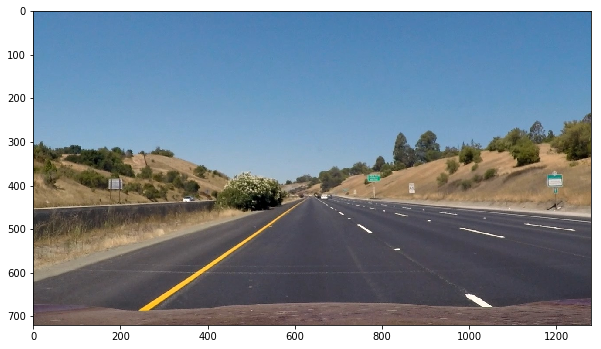

In [124]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#read a distorted image
exampleDistortedImage = mpimg.imread('test_images/straight_lines1.jpg')
#cv2.imwrite('distortedimage.png', cv2.cvtColor(exampleDistortedImage, cv2.COLOR_RGB2BGR))
# show the distorted image
plt.figure(figsize=(10,8))
plt.imshow(exampleDistortedImage)

# Evaluation of color channels and warped binary perspective
In the following steps, various color channels of the image is evaluated. The channels which distinctly highlight the lane markings which are yellow and white in color are considered. Here the saturation and lightness channel of the HLS image are considered. Here, saturation of a yellow line is usually high and the lightness of a white line is usually predominent.

In [125]:
import cv2

#function to undistort the image given camera calibration data
def undistort(img, mtx, dst):
    undistortedImage = cv2.undistort(img, mtx, dist, None, mtx)
    return undistortedImage

def warp(undistortedImage, src, dst):
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(undistortedImage, M, (undistortedImage.shape[1], undistortedImage.shape[0]))
    return warped, M, Minv

def getHlsColorChannels(warpedTopViewImage):
    hlsImage = cv2.cvtColor(warpedTopViewImage, cv2.COLOR_RGB2HLS)
    hChannel = hlsImage[:,:,0]
    lChannel = hlsImage[:,:,1]
    sChannel = hlsImage[:,:,2]   
    return hChannel, lChannel, sChannel

def visualizeColorChannels(undistortedImage, warpedImage, hChannel, lChannel, sChannel, combined):
    #visualize the undistorted and unwarped images           
    f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(20,10))
    f.subplots_adjust(hspace = .2, wspace=.05)
    
    ax1.imshow(undistortedImage)
    ax1.set_title('Undistorted Image', fontsize=20)

    ax2.imshow(warpedImage)
    ax2.set_title('Warped Image', fontsize=20)

    ax3.imshow(hChannel, cmap='gray')
    ax3.set_title('H Channel', fontsize=20)

    ax4.imshow(lChannel, cmap='gray')
    ax4.set_title('L Channel', fontsize=20)

    ax5.imshow(sChannel, cmap='gray')
    ax5.set_title('S Channel', fontsize=20)
    
    ax6.imshow(combined, cmap='gray')
    ax6.set_title('Combined Image', fontsize=20)
    
def getBinaryThresholdL(lChannel, thresh=(210, 255)):
    binaryImage = np.zeros_like(lChannel)
    binaryImage[(lChannel > thresh[0]) & (lChannel <= thresh[1])] = 1
    return binaryImage    

def getBinaryThresholdS(sChannel, thresh=(120, 255)):

    binaryImage = np.zeros_like(sChannel)
    binaryImage[(sChannel > thresh[0]) & (sChannel <= thresh[1])] = 1
    return binaryImage

def getCombinedBinaryImage(lChannel, sChannel):
    # Combine L and S channels
    combined = np.zeros_like(lChannel)
    combined[(lChannel == 1) | (sChannel == 1)] = 1  
    return combined

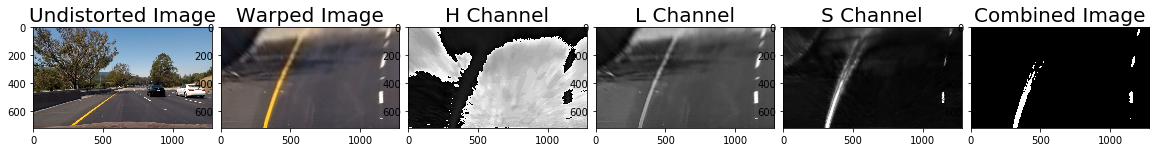

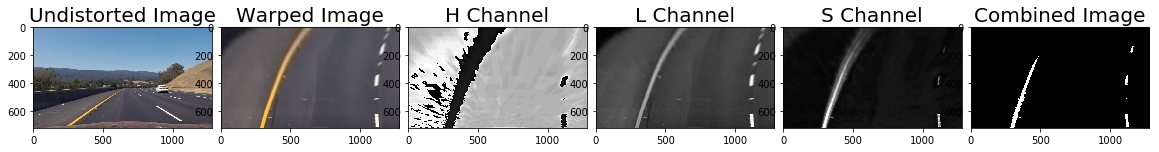

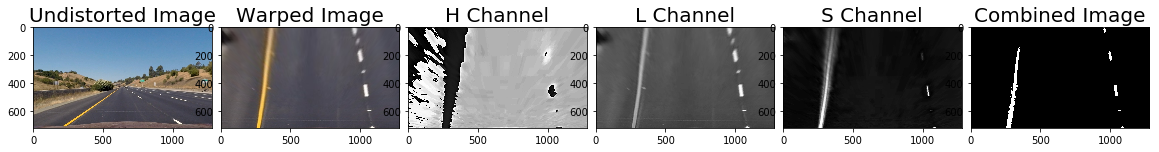

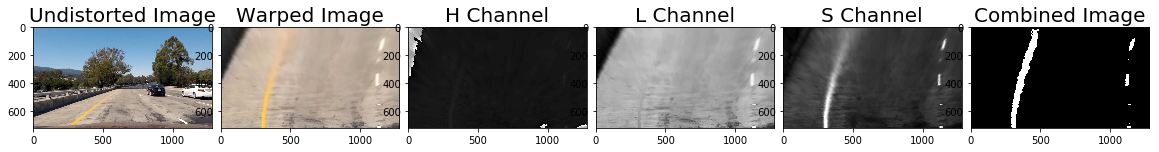

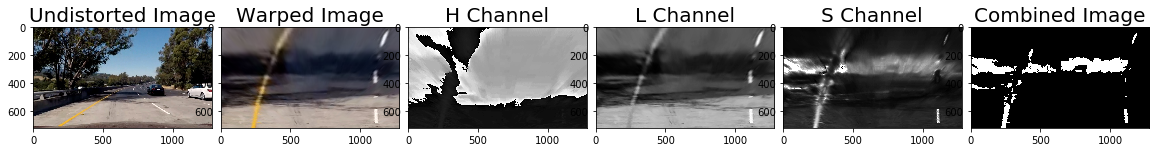

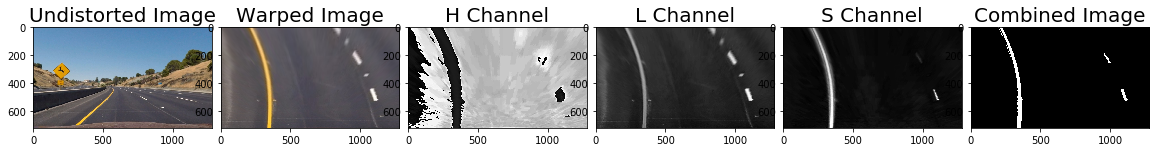

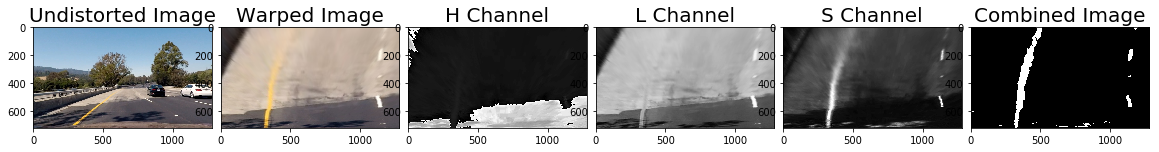

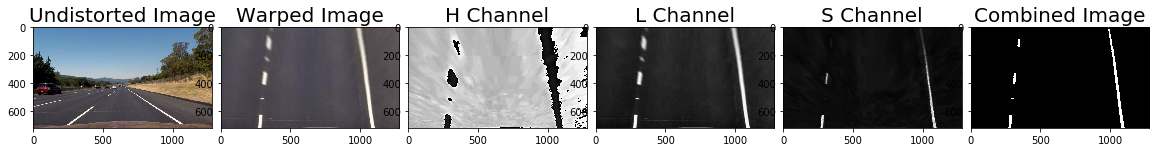

In [126]:
import pickle
import glob

distPickle = pickle.load( open( "calibratedCameraData/cameraCalibrationData.p", "rb" ) )
mtx = distPickle["mtx"]    
dist = distPickle["dist"]

#top left, top right, bottom left, bottom right
src = np.float32([[575,450], [700,450], [220,680], [1020,680]])

testImagesFolder = 'test_images/*.jpg'
testImagesFileNames = glob.glob(testImagesFolder)

for testImagesFileName in testImagesFileNames:
    strPath = str(i) + '.png'
    distortedImage = mpimg.imread(testImagesFileName)

    #undistort the image
    undistortedImage = undistort(distortedImage, mtx, dist)

    imageHeight, imageWidth, imageDepth = undistortedImage.shape
    horizontalLimit = 220
    verticalLimit = 0

    dst = np.float32([[horizontalLimit, verticalLimit], 
                     [imageWidth - horizontalLimit, verticalLimit], 
                     [horizontalLimit, imageHeight - verticalLimit],
                     [imageWidth - horizontalLimit, imageHeight - verticalLimit]])

    warpedImage, M, inv = warp(undistortedImage, src, dst)

    hChannel, lChannel, sChannel = getHlsColorChannels(warpedImage)
    binaryImageL = getBinaryThresholdL(lChannel)
    binaryImageS = getBinaryThresholdS(sChannel)
    combinedBinaryImage = getCombinedBinaryImage(binaryImageL, binaryImageS)
    
    '''
    cv2.imwrite('output_images/color_channels/distortedImage'+ strPath, cv2.cvtColor(distortedImage, cv2.COLOR_RGB2BGR))
    cv2.imwrite('output_images/color_channels/undistortedImage'+ strPath, cv2.cvtColor(undistortedImage, cv2.COLOR_RGB2BGR))    
    plt.imsave('output_images/color_channels/warpedImage'+ strPath, warpedImage)
    plt.imsave('output_images/color_channels/hChannelImage'+ strPath, hChannel, cmap = 'gray')
    plt.imsave('output_images/color_channels/lChannelImage'+ strPath, lChannel, cmap = 'gray')
    plt.imsave('output_images/color_channels/sChannelImage'+ strPath, sChannel, cmap = 'gray')
    plt.imsave('output_images/color_channels/combinedBinaryImage'+ strPath, combinedBinaryImage, cmap = 'gray')
    '''
    visualizeColorChannels(undistortedImage, warpedImage, hChannel, lChannel, sChannel, combinedBinaryImage)
    


In [127]:
def getWarpedBinaryPerspectiveImage(distortedImage, mtx, dist):

    #top left, top right, bottom left, bottom right
    src = np.float32([[575,450], [700,450], [220,680], [1020,680]])
    #undistort the image
    undistortedImage = undistort(distortedImage, mtx, dist)

    imageHeight, imageWidth, imageDepth = undistortedImage.shape
    horizontalLimit = 220
    verticalLimit = 0

    dst = np.float32([[horizontalLimit, verticalLimit], 
                        [imageWidth - horizontalLimit, verticalLimit], 
                        [horizontalLimit, imageHeight - verticalLimit],
                        [imageWidth - horizontalLimit, imageHeight - verticalLimit]])

    warpedImage, M, inv = warp(undistortedImage, src, dst)     
    hChannel, lChannel, sChannel = getHlsColorChannels(warpedImage)
    binaryImageL = getBinaryThresholdL(lChannel)
    binaryImageS = getBinaryThresholdS(sChannel)

    combinedBinaryImage = getCombinedBinaryImage(binaryImageL, binaryImageS)
#    plt.figure()
#    plt.imshow(combinedBinaryImage)
    return combinedBinaryImage, inv


# Fit Polygon to lane lines
The probable lane lines obtained from the warped binary perspective image now serves as a basis around which we try to fit a polygon from bottom to the top of the image. This way, we make sure that the lane lines are continous and accurate. 

If we have detected a lane line in the previous frame, then the area around the previously detected lane can be used as a starting point to find the lane in the new frame. Otherwise, using the sliding window approach, the whole area in the image is used to find lane lines.

In [128]:
#copied from the lecture.
def fitPolyWithSlidingWindow(binary_warped):
    
    import numpy as np
    import cv2
    import matplotlib.pyplot as plt

    # Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]/2:,:], axis=0)
    
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 10
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 150
    # Set minimum number of pixels found to recenter window
    minpix = 80
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    
    # At this point, you're done! But here is how you can visualize the result as well:

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    
    '''
    plt.imshow(out_img)
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    plt.xlim(0, 1280)
    plt.ylim(720, 0)
    plt.imsave('output_images/sliding_window.png', out_img, cmap = 'gray')
    '''
    return left_fit, right_fit, left_lane_inds, right_lane_inds

In [129]:
def fitPolyFromPrevious(binary_warped, left_fit, right_fit):
    # Now you know where the lines are you have a fit! In the next frame of video you don't need to do a blind search again,
    # but instead you can just search in a margin around the previous line position like this:

    # Assume you now have a new warped binary image 
    # from the next frame of video (also called "binary_warped")
    # It's now much easier to find line pixels!
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & 
                      (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & 
                       (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    left_fit_new, right_fit_new = (None, None)
    # Fit a second order polynomial to each
    if len(leftx) != 0:
        left_fit_new = np.polyfit(lefty, leftx, 2)
        
    if len(rightx) != 0:    
        right_fit_new = np.polyfit(righty, rightx, 2)

    return left_fit_new, right_fit_new, left_lane_inds, right_lane_inds, nonzerox, nonzeroy, margin

    

# Define Image pipeline 
The image pipeline takes a distorted image and camera calibration parameters and returns a warped binary image. Then, the polygons are fitted on the warped binary image using both sliding window and fit from previous techniques. 

In [130]:
import pickle
import glob

def pipeline(inputImage, mtx, dist):
    combinedBinaryImage, inv = getWarpedBinaryPerspectiveImage(exampleDistortedImage, mtx, dist)
    return combinedBinaryImage, inv


In [131]:
exampleDistortedImage = mpimg.imread('test_images/test6.jpg')
distPickle = pickle.load( open( "calibratedCameraData/cameraCalibrationData.p", "rb" ) )
mtx = distPickle["mtx"]    
dist = distPickle["dist"]
combinedBinaryImage, inv = pipeline(exampleDistortedImage, mtx, dist)
left_fit_sliding_window, right_fit_sliding_window, left_lane_inds, right_lane_inds = fitPolyWithSlidingWindow(combinedBinaryImage)

(720, 0)

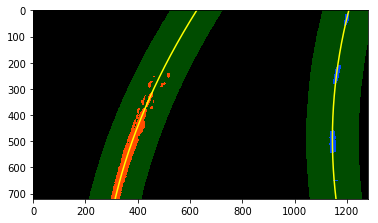

In [132]:

exampleDistortedImageNew = mpimg.imread('test_images/test5.jpg')
binary_warped, inv = pipeline(exampleDistortedImageNew, mtx, dist)
left_fit, right_fit, left_lane_inds, right_lane_inds, nonzerox, nonzeroy, margin = fitPolyFromPrevious(binary_warped, left_fit_sliding_window, right_fit_sliding_window)
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

# And you're done! But let's visualize the result here as well

# Create an image to draw on and an image to show the selection window
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
window_img = np.zeros_like(out_img)
# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
#plt.imsave('output_images/lane_fitting.png', result, cmap = 'gray')

# Find Radius of Curvature and Distance of the vehicle from the lane center
The radius of curvature of the lane in front is calculated with the help of lane fits and Ids from the polynomial fitting techniques along with the position of the vehicle from the center of the lane. 

In [133]:
def determineRadiusOfCurvatureAndVehiclePosition(bin_img, l_fit, r_fit, left_lane_ids, right_lane_ids):

    ploty = np.linspace(0, 719, num=720)# to cover same y-range as image

    # Define y-value where we want radius of curvature
    # I'll choose the maximum y-value, corresponding to the bottom of the image
    h = bin_img.shape[0]
    ploty = np.linspace(0, h-1, h)
    y_eval = np.max(ploty)

    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 3.048/100 # meters per pixel in y dimension
    xm_per_pix = 3.7/378 # meters per pixel in x dimension

    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = bin_img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_ids]
    lefty = nonzeroy[left_lane_ids] 
    rightx = nonzerox[right_lane_ids]
    righty = nonzeroy[right_lane_ids]
    left_curverad = 0  
    right_curverad = 0
    # Fit new polynomials to x,y in world space
    if len(leftx) != 0 and len(rightx) != 0:
        left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
        right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
        # Calculate the new radii of curvature
        left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
        right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    # Example values: 632.1 m    626.2 m
    
    # Distance from center is image x midpoint - mean of l_fit and r_fit intercepts 
    if r_fit is not None and l_fit is not None:
        car_position = bin_img.shape[1]/2
        l_fit_x_int = l_fit[0]*h**2 + l_fit[1]*h + l_fit[2]
        r_fit_x_int = r_fit[0]*h**2 + r_fit[1]*h + r_fit[2]
        lane_center_position = (r_fit_x_int + l_fit_x_int) /2
        center_dist = (car_position - lane_center_position) * xm_per_pix
        
    return left_curverad, right_curverad, center_dist

In [134]:
left_curverad, right_curverad, center_dist = determineRadiusOfCurvatureAndVehiclePosition(binary_warped, left_fit, right_fit, left_lane_inds, right_lane_inds)

# Draw lane, Radius of Curvature and Distance from the lane center
The lane is now drawn on the original image along with the calculated radius of curvature and distance from the vehicle from the lane center

In [116]:
def drawLaneOntoOriginalImage(original_img, binary_img, l_fit, r_fit, Minv):
    
    new_img = np.copy(original_img)

    if l_fit is None or r_fit is None:
        return original_img
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_img).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    h,w = binary_img.shape
    ploty = np.linspace(0, h-1, num=h)# to cover same y-range as image
    left_fitx = l_fit[0]*ploty**2 + l_fit[1]*ploty + l_fit[2]
    right_fitx = r_fit[0]*ploty**2 + r_fit[1]*ploty + r_fit[2]

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    cv2.polylines(color_warp, np.int32([pts_left]), isClosed=False, color=(255,0,255), thickness=15)
    cv2.polylines(color_warp, np.int32([pts_right]), isClosed=False, color=(0,255,255), thickness=15)

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (w, h)) 

    # Combine the result with the original image
    result = cv2.addWeighted(new_img, 1, newwarp, 0.5, 0)
    
    
    return result
    

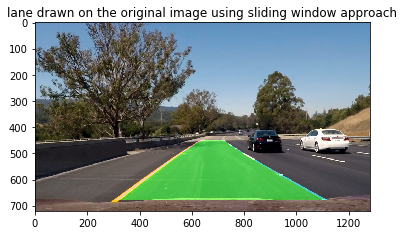

In [135]:
exampleImg_out1 = drawLaneOntoOriginalImage(exampleDistortedImage, combinedBinaryImage, left_fit_sliding_window, right_fit_sliding_window, inv)
plt.figure()
plt.title('lane drawn on the original image using sliding window approach')
plt.imshow(exampleImg_out1)
#plt.imsave('output_images/lane_draw_on_original.png', exampleImg_out1)

In [136]:
def draw_data(original_img, curv_rad, center_dist):
    new_img = np.copy(original_img)
    h = new_img.shape[0]
    font = cv2.FONT_HERSHEY_DUPLEX
    text = 'Curve radius: ' + '{:04.2f}'.format(curv_rad) + 'm'
    cv2.putText(new_img, text, (40,70), font, 1.5, (200,255,155), 2, cv2.LINE_AA)
    direction = ''
    if center_dist > 0:
        direction = 'right'
    elif center_dist < 0:
        direction = 'left'
    abs_center_dist = abs(center_dist)
    text = '{:04.3f}'.format(abs_center_dist) + 'm ' + direction + ' of center'
    cv2.putText(new_img, text, (40,120), font, 1.5, (200,255,155), 2, cv2.LINE_AA)
    return new_img

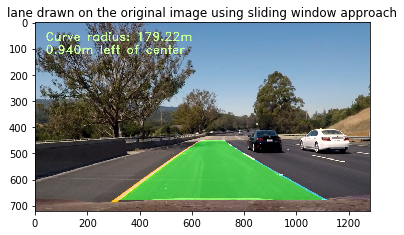

In [137]:
exampleImg_out2 = draw_data(exampleImg_out1, (left_curverad+right_curverad)/2, center_dist)
plt.figure()
plt.title('lane drawn on the original image using sliding window approach')
plt.imshow(exampleImg_out2)
#plt.imsave('output_images/lane_draw_on_original_with_roc.png', exampleImg_out2)

# Create a Video Pipeline
In the following steps, a similar pipeline is created to work on the video data. Since in a video, the information about the previous frames need to be remembered, a line class is defined to hold important parameters of the line.

Then, each frame in the video is considered as a new image and the lane lines are detected and drawn in each frame.

In [138]:
import pickle
import glob

def videoPipeline(inputImage, mtx, dist):
    combinedBinaryImage, inv = getWarpedBinaryPerspectiveImage(inputImage, mtx, dist)
    return combinedBinaryImage, inv

In [139]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False      
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = []   
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        
    def add_fit(self, fit, inds):
        # add a found fit to the line, up to 5
        if fit is not None:
            if self.best_fit is not None:
                # if we have a best fit, see how this new fit compares
                self.diffs = abs(fit-self.best_fit) 
            if (self.diffs[0] > 0.001 or \
               self.diffs[1] > 1.0 or \
               self.diffs[2] > 300.) and \
               len(self.current_fit) > 0:
                # if there are some current fits, then discard since it is a bad fit comparitively 
                self.detected = False
            else:
                self.detected = True
                self.px_count = np.count_nonzero(inds)
                self.current_fit.append(fit)
                
                if len(self.current_fit) > 5:
                    # throw out old fits, keep newest n
                    self.current_fit = self.current_fit[len(self.current_fit)- 5:]
                self.best_fit = np.average(self.current_fit, axis=0)
                #self.best_fit = self.current_fit

        else:
            self.detected = False
            if len(self.current_fit) > 0:
                # throw out oldest fit
                self.current_fit = self.current_fit[:len(self.current_fit)-1]
            if len(self.current_fit) > 0:
                # if there are still any fits in the queue, best_fit is their average
                self.best_fit = np.average(self.current_fit, axis=0)
                #self.best_fit = self.current_fit
       

In [140]:
def processVideoImage(videoImage):

    imageDuplicate = np.copy(videoImage)    
    binary_warped, inv = videoPipeline(videoImage, mtx, dist)

    if l_line.detected and r_line.detected:
        l_fit, r_fit, l_lane_inds, r_lane_inds, x, y, z = fitPolyFromPrevious(binary_warped, l_line.best_fit, r_line.best_fit)
    else:
        l_fit, r_fit, l_lane_inds, r_lane_inds = fitPolyWithSlidingWindow(binary_warped)
    
    
    # invalidate both fits if the difference in their x-intercepts isn't around 350 px (+/- 100 px)
    if l_fit is not None and r_fit is not None:
        # calculate x-intercept (bottom of image, x=image_height) for fits
        h = videoImage.shape[0]
        l_fit_x_int = l_fit[0]*h**2 + l_fit[1]*h + l_fit[2]
        r_fit_x_int = r_fit[0]*h**2 + r_fit[1]*h + r_fit[2]
        x_int_diff = abs(r_fit_x_int-l_fit_x_int)
        if abs(800 - x_int_diff) > 300:
            l_fit = None
            r_fit = None
    
    
    l_line.add_fit(l_fit, l_lane_inds)
    r_line.add_fit(r_fit, r_lane_inds)

            
    # draw the current best fit if it exists
    if l_line.best_fit is not None and r_line.best_fit is not None:
        img_out1 = drawLaneOntoOriginalImage(imageDuplicate, binary_warped, l_line.best_fit, r_line.best_fit , inv)
        rad_l, rad_r, center_dist = determineRadiusOfCurvatureAndVehiclePosition(binary_warped, l_line.best_fit, r_line.best_fit, l_lane_inds, r_lane_inds)
        img_out = draw_data(img_out1, (rad_l+rad_r)/2, center_dist)
    else:
        img_out = imageDuplicate
        
    return img_out 

In [142]:
from moviepy.editor import VideoFileClip
import os

l_line = Line()
r_line = Line()

distPickle = pickle.load( open( "calibratedCameraData/cameraCalibrationData.p", "rb" ) )
mtx = distPickle["mtx"]    
dist = distPickle["dist"]


video_output1 = 'project_video_output.mp4'
#video_input1 = VideoFileClip('project_video.mp4').subclip(22,36)
video_input1 = VideoFileClip('project_video.mp4')

processed_video = video_input1.fl_image(processVideoImage)
%time processed_video.write_videofile(video_output1, audio=False)



t:   0%|          | 3/1260 [00:00<01:03, 19.82it/s, now=None]

Moviepy - Building video project_video_output.mp4.
Moviepy - Writing video project_video_output.mp4




t:  20%|█▉        | 249/1260 [00:14<00:55, 18.37it/s, now=None]


t:  40%|███▉      | 502/1260 [00:27<00:42, 18.04it/s, now=None]


t:  60%|██████    | 756/1260 [00:41<00:29, 17.19it/s, now=None]


t:  79%|███████▉  | 1000/1260 [00:57<00:22, 11.75it/s, now=None]


t:  98%|█████████▊| 1240/1260 [01:13<00:01, 15.37it/s, now=None]


t: 100%|██████████| 1260/1260 [01:14<00:00, 16.27it/s, now=None]
                                                                

Moviepy - Done !
Moviepy - video ready project_video_output.mp4
CPU times: user 1min 48s, sys: 2.44 s, total: 1min 50s
Wall time: 1min 15s
